In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
_a = 0.5
_b = 0.3

In [208]:
points = np.array([[x, _a * x + _b + .1 * np.random.randn() + (np.random.randint(100) == 0) * np.random.rand() * 10] for x in np.arange(0, 10, 0.01)])

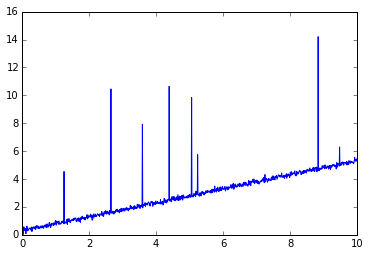

In [209]:
plt.plot(points[:, 0], points[:, 1])

In [210]:
data = points
model = (0, 0)
n = 2
k = 1000
t = 2
d = 800
iterations = 0


In [ ]:
def getParamWithSamples(samples):
    p0 = samples[0]
    p1 = samples[1]
    dp = p1 - p0
    a = dp[1] / dp[0]
    b = p0[1] - a * p0[0]
    return a, b
    

def getError(model, p):
    a = model[0]
    b = model[1]
    x = p[0]
    y = p[1]
    return np.abs(a * x + b - y)

bestfit = None
besterr = float('inf')
iterations = 0
while iterations < k:
    maybeinliers = data[np.random.choice(len(data), 2, False)]
    maybemodel = getParamWithSamples(maybeinliers)
    
    alsoinliers = []
    for p in data:
        if (p == maybeinliers).any(): continue
        if getError(maybemodel, p) > t: continue
            
        alsoinliers.append(p)
        
    
    if len(alsoinliers) > d:
        bettermodel = maybemodel
        thiserror = np.array([getError(maybemodel, p) for p in data]).mean()
        if thiserror < besterr:
            bestfit = bettermodel
            besterr = thiserror
        
    iterations += 1
    
print bestfit